In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
import h5py
particle = 'piplus'
torch.set_default_dtype(torch.float64)

## MSE

In [2]:
device = torch.device('cuda:0')

In [3]:
discrete_folder = '/home/yp325/regression_project/data_discrete_100k'

In [4]:
class RegressionLayerNet(nn.Module):
    def __init__(self):
        super(RegressionLayerNet, self).__init__()
        self.fc1 = nn.Linear(6, 256)  
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 1)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [6]:
energy_list = [10,20,30,40,50,60,70,80,90]

In [7]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_0.pth'
MSE_uniform_model_0 = RegressionLayerNet().to(device)
MSE_uniform_model_0.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_0.eval()

MSE_bias_uniform_0 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)

    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_0(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_0[int(which_energy)] = full_outputs_norm

    

In [8]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_1.pth'
MSE_uniform_model_1 = RegressionLayerNet().to(device)
MSE_uniform_model_1.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_1.eval()

MSE_bias_uniform_1 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
                          
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_1(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_1[int(which_energy)] = full_outputs_norm

In [9]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_2.pth'
MSE_uniform_model_2 = RegressionLayerNet().to(device)
MSE_uniform_model_2.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_2.eval()

MSE_bias_uniform_2 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
                          
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_2(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_2[int(which_energy)] = full_outputs_norm

In [10]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_3.pth'
MSE_uniform_model_3 = RegressionLayerNet().to(device)
MSE_uniform_model_3.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_3.eval()

MSE_bias_uniform_3 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
                          
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_3(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_3[int(which_energy)] = full_outputs_norm

In [11]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_4.pth'
MSE_uniform_model_4 = RegressionLayerNet().to(device)
MSE_uniform_model_4.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_4.eval()

MSE_bias_uniform_4 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
                          
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_4(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_4[int(which_energy)] = full_outputs_norm

In [12]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_5.pth'
MSE_uniform_model_5 = RegressionLayerNet().to(device)
MSE_uniform_model_5.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_5.eval()

MSE_bias_uniform_5 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
                          
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_5(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_5[int(which_energy)] = full_outputs_norm

In [13]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_6.pth'
MSE_uniform_model_6 = RegressionLayerNet().to(device)
MSE_uniform_model_6.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_6.eval()

MSE_bias_uniform_6 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
                          
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_6(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_6[int(which_energy)] = full_outputs_norm

In [14]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_7.pth'
MSE_uniform_model_7 = RegressionLayerNet().to(device)
MSE_uniform_model_7.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_7.eval()

MSE_bias_uniform_7 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
                          
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_7(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_7[int(which_energy)] = full_outputs_norm

In [15]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_8.pth'
MSE_uniform_model_8 = RegressionLayerNet().to(device)
MSE_uniform_model_8.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_8.eval()

MSE_bias_uniform_8 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
                          
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_8(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_8[int(which_energy)] = full_outputs_norm

In [16]:
best_model_uniform_path = 'MSE_uniform_models_large/best_model_uniform_9.pth'
MSE_uniform_model_9 = RegressionLayerNet().to(device)
MSE_uniform_model_9.load_state_dict(torch.load(best_model_uniform_path))
MSE_uniform_model_9.eval()

MSE_bias_uniform_9 = {}

for which_energy in energy_list:
    dataset = h5py.File(os.path.join(discrete_folder, '{}_{}GeV'.format(particle,which_energy))+'.hdf5', 'r')
    n_events = 100000
    considered_idx = np.arange(n_events)
    with torch.no_grad():     
        x0 = torch.tensor(dataset['layer_0'][considered_idx,:])/ 1e5
        x1 = torch.tensor(dataset['layer_1'][considered_idx,:])/ 1e5
        x2 = torch.tensor(dataset['layer_2'][considered_idx,:])/ 1e5
        x3 = torch.tensor(dataset['layer_3'][considered_idx,:])/ 1e5
        x4 = torch.tensor(dataset['layer_4'][considered_idx,:])/ 1e5
        x5 = torch.tensor(dataset['layer_5'][considered_idx,:])/ 1e5
        E  = torch.tensor(dataset["energy"][considered_idx,:])/1e2

        E0 = x0.sum(dim=(1, 2))
        E1 = x1.sum(dim=(1, 2))
        E2 = x2.sum(dim=(1, 2))
        E3 = x3.sum(dim=(1, 2))
        E4 = x4.sum(dim=(1, 2))
        E5 = x5.sum(dim=(1, 2))

        x = torch.cat((E0.unsqueeze(1),
                           E1.unsqueeze(1),
                           E2.unsqueeze(1),
                            E3.unsqueeze(1),
                          E4.unsqueeze(1),
                          E5.unsqueeze(1)), 1)
       
    full_outputs = []
    for i in range(500):
        output = MSE_uniform_model_9(x[int((i)*200):int((i+1)*200)].to(device))
        output = output.detach().cpu().numpy().reshape(-1)
        output = (10**output)/10
        full_outputs.append(output)
    full_outputs = np.array(full_outputs).reshape(1,-1)
    full_outputs_norm = ((full_outputs*1e2)/int(which_energy))
    MSE_bias_uniform_9[int(which_energy)] = full_outputs_norm

In [17]:
import scipy.stats as stats
import random

(100000,)
10.0 0.9616624525396539 0.003437965370761818
10.0 0.15608858021883704 0.002833536119249239
(100000,)
20.0 0.9871364260445226 0.004569368788516656
20.0 0.1212094080668898 0.0004074501939677198
(100000,)
30.0 0.9920373484474716 0.002826584157457658
30.0 0.10586301250249082 0.0007235889864244011
(100000,)
40.0 0.9947773030182931 0.0022651226120671227
40.0 0.09524086444824689 0.0003730393583064976
(100000,)
50.0 0.9939316145482187 0.001928958715153449
50.0 0.08667146918290429 0.00045565346274483023
(100000,)
60.0 0.9923964146867684 0.0014077853644571463
60.0 0.08119177049058719 0.00025804151249876985
(100000,)
70.0 0.9919308829438618 0.003289250890337041
70.0 0.07620992650724293 0.0003627713231272048
(100000,)
80.0 0.9912739630165271 0.0032913063926823787
80.0 0.07103061568784937 0.00042194179233256035
(100000,)
90.0 1.0144327199834358 0.0009052990287697121
90.0 0.11305876346780978 0.0006543902875158541


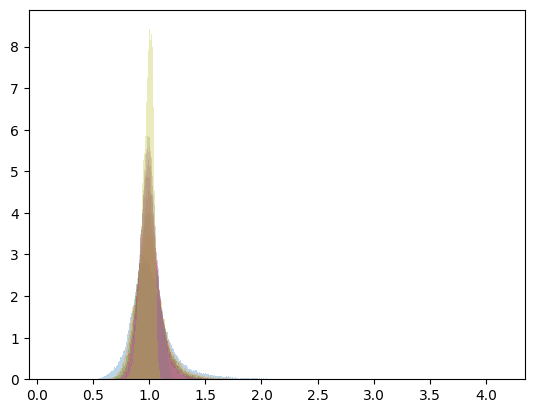

In [19]:
MSE_uniform_mode = []
MSE_uniform_mode_err = []

full_true_res_MSE = [] 
full_true_res_MSE_err = []

fixed_energies = np.linspace(10,90,9)
repeats = 20
bandwidth = 'scott'

mode_uni_full = []
for E in fixed_energies:


    MSE_0 = MSE_bias_uniform_0[E].flatten()
    MSE_1 = MSE_bias_uniform_1[E].flatten()
    MSE_2 = MSE_bias_uniform_2[E].flatten()
    MSE_3 = MSE_bias_uniform_3[E].flatten()
    MSE_4 = MSE_bias_uniform_4[E].flatten()
    MSE_5 = MSE_bias_uniform_5[E].flatten()
    MSE_6 = MSE_bias_uniform_6[E].flatten()
    MSE_7 = MSE_bias_uniform_7[E].flatten()
    MSE_8 = MSE_bias_uniform_8[E].flatten()
    MSE_9 = MSE_bias_uniform_9[E].flatten()

    n_MSE_uniform, bins_uni,_ = plt.hist(MSE_0,bins=400,density=True,alpha=0.3,label='MSE')


    MSE_full = (MSE_0 + MSE_1 + MSE_2 + MSE_3 + MSE_4 + MSE_5 + MSE_6 + MSE_7 + MSE_8+ MSE_9)/10
    print(MSE_full.shape)
    first = True

    for i in range(repeats):
        y = np.array(random.choices(MSE_full.tolist(), k=100000)) # create bootstrap sample with 100k events (sample with replacement)
        kernel = stats.gaussian_kde(y,bw_method=bandwidth) # KDE with gaussian kernel

        x_d = np.linspace(bins_uni[0],bins_uni[-1],10000)

        height = kernel.pdf(x_d)
        mode_value_temp = x_d[np.argmax(height)] # estimate mode of current bootstrap sample

        percentile_mode = stats.percentileofscore(MSE_full, mode_value_temp)
        sigma_low = np.percentile(MSE_full,max(percentile_mode-34,0),method = 'median_unbiased') 
        sigma_high = np.percentile(MSE_full, min(percentile_mode+34,100), method = 'median_unbiased')
        true_res_MSE_temp = (sigma_high-sigma_low)/2
    
        if  first== True : 
            mode_array = mode_value_temp.reshape(-1,1)
            res_array = true_res_MSE_temp.reshape(-1,1)
            first = False
        else: 
            mode_array = np.append(mode_array,mode_value_temp.reshape(-1,1),1)
            res_array = np.append(res_array,true_res_MSE_temp.reshape(-1,1),1)

    mode_value = mode_array.mean()
    mode_err = mode_array.std()

    true_res_value = res_array.mean()
    true_res_err = res_array.std()
    full_true_res_MSE.append(true_res_value)
    full_true_res_MSE_err.append(true_res_err)

    print(E,mode_value,mode_err)
    print(E, true_res_value, true_res_err)

    MSE_uniform_mode.append(mode_value)
    MSE_uniform_mode_err.append(mode_err)

In [5]:
uni_mode_try1 = np.load("precious_results_mode/try_1/flow_uniform_mode.npy")
uni_mode_err_try1 = np.load("precious_results_mode/try_1/flow_uniform_mode_err.npy")
res_try1 = np.load("precious_results_mode/try_1/flow_uniform_true_res.npy")
res_err_try1 = np.load("precious_results_mode/try_1/flow_uniform_true_res_err.npy")

log_mode_try1 = np.load("precious_results_mode/try_1/flow_log_mode.npy")
log_mode_err_try1 = np.load("precious_results_mode/try_1/flow_log_mode_err.npy")

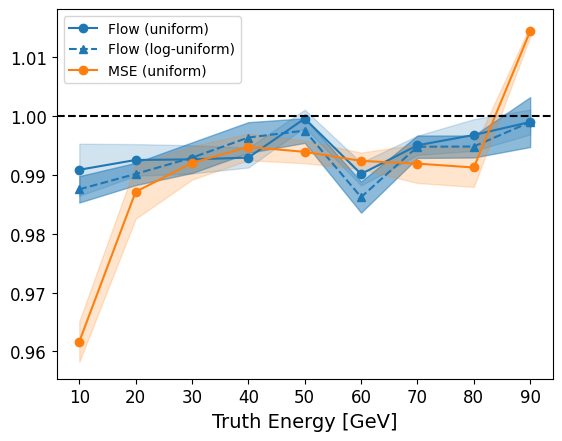

In [21]:
plt.plot(fixed_energies,uni_mode_try1,label="Flow (uniform)",color="tab:blue", marker='o',markersize=6)

#plt.plot(fixed_energies,MSE_uniform_mode,label="MSE (uniform)",color="tab:orange", linewidth=2, marker='o',markersize=6)

plt.fill_between(fixed_energies, np.array(uni_mode_try1)-np.array(uni_mode_err_try1), np.array(uni_mode_try1)+np.array(uni_mode_err_try1),color="tab:blue",alpha=0.2)
# plt.fill_between(fixed_energies, np.array(MSE_uniform_mode)-np.array(MSE_uniform_mode_err), np.array(MSE_uniform_mode)+np.array(MSE_uniform_mode_err),color="tab:orange",alpha=0.2)

plt.plot(fixed_energies,log_mode_try1,label="Flow (log-uniform)",color="tab:blue", marker='^',markersize=6, linestyle='--')

# plt.plot(fixed_energies,MSE_log_mode,label="MSE (log-uniform)",color="tab:orange", linewidth=2, marker='^',markersize=6, linestyle='--')

plt.fill_between(fixed_energies, np.array(log_mode_try1)-np.array(log_mode_err_try1), np.array(log_mode_try1)+np.array(log_mode_err_try1),color="tab:blue",alpha=0.5)

plt.plot(fixed_energies,MSE_uniform_mode,label="MSE (uniform)",color="tab:orange", marker='o',markersize=6)

plt.fill_between(fixed_energies, np.array(MSE_uniform_mode)-np.array(MSE_uniform_mode_err), np.array(MSE_uniform_mode)+np.array(MSE_uniform_mode_err),color="tab:orange",alpha=0.2)

plt.legend()
plt.xlabel("Truth Energy [GeV]",fontsize =14)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.axhline(1,linestyle='--',c='k')
#plt.ylim([0.970,1.005])

In [34]:
np.save("precious_results_mode/try_1_MSE_large/MSE_uniform_mode",MSE_uniform_mode)
np.save("precious_results_mode/try_1_MSE_large/MSE_uniform_mode_err",MSE_uniform_mode_err)

np.save("precious_results_mode/try_1_MSE_large/MSE_uniform_true_res",full_true_res_MSE)
np.save("precious_results_mode/try_1_MSE_large/MSE_uniform_true_res_err",full_true_res_MSE_err)

In [23]:
MSE_uni_try = np.load("precious_results_mode/try_1_MSE_large/MSE_uniform_mode.npy")
MSE_uni_try_err = np.load("precious_results_mode/try_1_MSE/MSE_uniform_mode_err.npy")

MSE_res_try1 = np.load("precious_results_mode/try_1_MSE_large/MSE_uniform_true_res.npy")
MSE_res_err_try1 = np.load("precious_results_mode/try_1_MSE_large/MSE_uniform_true_res_err.npy")